In [4]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [29]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)
patient_tissues = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.csv', index_col=0)
patient_tissues = patient_tissues.ix[[x for x in patient_mutations.index if x in patient_tissues.index]]

In [30]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)

In [31]:
patients = patient_tissues[patient_tissues.Tissue == 'THCA'].index

In [32]:
patients

Index([u'TCGA-J8-A42S', u'TCGA-E8-A44M', u'TCGA-E8-A44K', u'TCGA-EL-A4KH',
       u'TCGA-EL-A4KG', u'TCGA-EL-A4KD', u'TCGA-EL-A4K9', u'TCGA-EL-A4K0',
       u'TCGA-EL-A4K1', u'TCGA-EL-A4K6',
       ...
       u'TCGA-EM-A22P', u'TCGA-EM-A22Q', u'TCGA-DJ-A4UR', u'TCGA-DJ-A4UQ',
       u'TCGA-DJ-A4UP', u'TCGA-DJ-A4UW', u'TCGA-DJ-A4UT', u'TCGA-DJ-A4UL',
       u'TCGA-DO-A1K0', u'TCGA-J8-A3NZ'],
      dtype='object', length=451)

In [62]:
len(patients)

451

In [33]:
patient_mutations = patient_mutations.ix[patients]
classI = classI.ix[patients]
classII = classII.ix[patients]

In [34]:
mutation_counts = patient_mutations.sum().sort_values(ascending=False).head(17)

In [35]:
mutation_counts

BRAF_V600E             264
NRAS_Q61R               26
HRAS_Q61R               13
NRAS_Q61K                7
HRAS_Q61K                3
AKT1_E17K                3
UBQLN2_R309S             2
KRAS_Q61K                2
BRAF_K601E               2
PIK3CA_D186H             1
PPP2R1A_A273V            1
BRAF_ifd_140778037       1
AKT1_L52R                1
MAP2K1_ifd_66436756      1
OR5I1_L294F              1
KRAS_Q61R                1
PIK3CA_M1043I            1
dtype: int64

In [ ]:
with_braf = patient_mutations[

In [45]:
classI.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-J8-A42S,1.612097,5.445763,6.585402,1.182953,3.989449,0.762315,0.740741,0.867936,7.402721,1.142857,...,9.014634,4.798310,2.266437,6.740478,0.262774,11.176930,0.544663,0.156134,0.116067,1.976940
TCGA-E8-A44M,6.427415,5.454385,0.219173,0.650033,11.346866,1.176737,3.513495,4.110418,2.290589,0.987828,...,13.793827,4.840442,3.095999,2.987552,0.602204,10.607915,1.207794,0.604406,1.605686,0.445295
TCGA-E8-A44K,4.077670,9.026866,3.920792,2.966759,11.364020,0.912343,3.750000,25.012658,4.189868,2.926829,...,13.951220,18.581016,4.960630,0.717791,0.334176,14.926829,3.566038,0.088081,7.531034,0.089182
TCGA-EL-A4KH,3.260860,2.807102,2.699548,0.438058,11.676196,0.193422,3.571351,4.816252,7.455868,0.330528,...,10.106115,3.887389,7.052341,3.911779,0.147239,13.271149,1.066088,0.452424,1.101632,1.558541
TCGA-EL-A4KG,9.790440,3.430114,1.636170,4.647887,16.725664,0.055012,4.403226,13.475936,10.344050,3.737705,...,15.120445,17.624503,4.341085,6.882353,0.470588,17.313395,4.211699,0.562500,0.315406,1.224409


In [50]:
patient_mutations[patient_mutations['BRAF_V600E'] == 1].index

Index([u'TCGA-J8-A42S', u'TCGA-E8-A44K', u'TCGA-EL-A4KH', u'TCGA-EL-A4KG',
       u'TCGA-EL-A4K9', u'TCGA-EL-A4K0', u'TCGA-EL-A4K1', u'TCGA-EL-A4K7',
       u'TCGA-EL-A4K4', u'TCGA-FY-A3I4',
       ...
       u'TCGA-BJ-A0ZH', u'TCGA-BJ-A0ZB', u'TCGA-BJ-A0Z3', u'TCGA-DE-A4MC',
       u'TCGA-EM-A22M', u'TCGA-EM-A22P', u'TCGA-DJ-A4UW', u'TCGA-DJ-A4UL',
       u'TCGA-DO-A1K0', u'TCGA-J8-A3NZ'],
      dtype='object', length=264)

In [59]:
mutation = 'NRAS_Q61R'
mutation_df = pd.DataFrame({'Mutated': patient_mutations[mutation],
                            'ClassI': classI[mutation],
                            'ClassII': classII[mutation]})

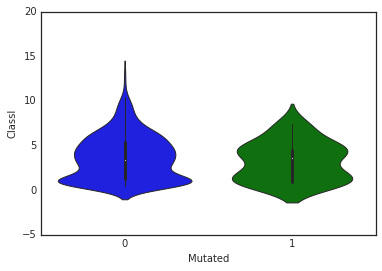

In [60]:
sns.violinplot(x='Mutated', y='ClassI', data=mutation_df)

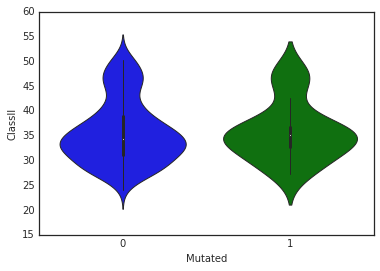

In [61]:
sns.violinplot(x='Mutated', y='ClassII', data=mutation_df)